In [14]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = (16,8)

# handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

# time series related imports
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima


In [15]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv', index_col="Month", parse_dates=True)
df.head()

,Tourist Arrival,CCI,PMI,REERI,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
Month,,,,,,,,,,,,,,,,,,,,,
2008-01-01,399556,98,53,109,11,59,32,8,58,7,...,27,58,29,18,20,0,32,0,8,Train
2008-01-02,411032,91,53,108,0,51,0,0,46,6,...,27,58,31,10,19,5,39,7,5,Train
2008-01-03,414332,90,53,106,0,57,7,24,58,6,...,27,50,29,38,28,6,30,0,0,Train
2008-01-04,395900,83,56,106,0,51,6,9,58,6,...,27,41,30,25,22,8,45,0,8,Train
2008-01-05,366387,80,57,106,0,57,0,7,57,6,...,27,44,24,16,22,5,47,0,9,Train


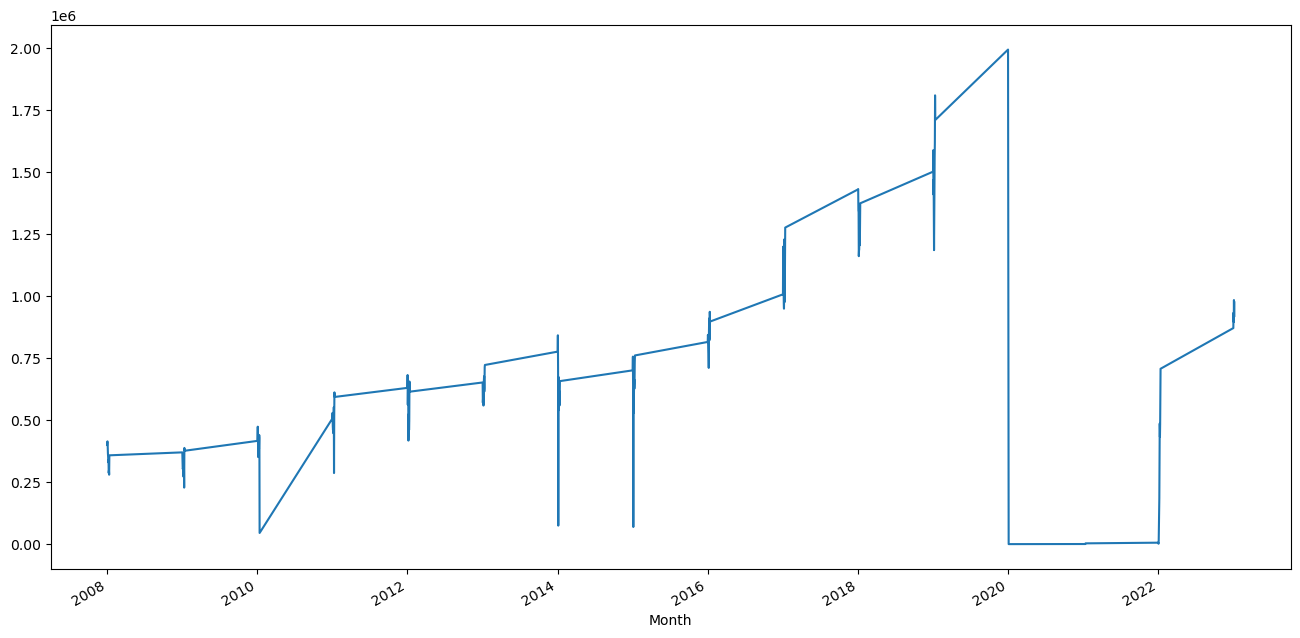

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax = df['Tourist Arrival'].plot()
color_arr = ['g', 'r', 'm', 'b', 'y', 'k']
c_indx = 0
for x in df[df['Tourist Arrival']==1].index:
    ax.axvline(x=x, color=color_arr[c_indx], linewidth=0.5)
    if color_arr[c_indx] == 'k':
        c_indx = 0
    else:
        c_indx +=1

In [17]:
df1=df.drop(["Class"], axis=1)
print(df1)

            Tourist Arrival  CCI  PMI  REERI  Airbnb Vietnam  \
Month                                                          
2008-01-01           399556   98   53    109              11   
2008-01-02           411032   91   53    108               0   
2008-01-03           414332   90   53    106               0   
2008-01-04           395900   83   56    106               0   
2008-01-05           366387   80   57    106               0   
...                     ...  ...  ...    ...             ...   
2023-01-02           932969   87   51    132              64   
2023-01-03           895425   82   48    132              65   
2023-01-04           984146   84   47    131              58   
2023-01-05           916257   79   45    131              56   
2023-01-06           975010   84   46    131              63   

            Vietnam restaurant  Shopping in Hanoi  Shopping in Ho Chi Minh  \
Month                                                                        
2008-01-01 

In [18]:
auto_arima(df1['Tourist Arrival'], m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4947.042, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4937.754, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4938.437, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4945.121, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4948.808, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4939.754, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4939.754, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4938.184, Time=0.05 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4940.975, Time=0.30 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=4935.707, Time=0.05 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=4937.707, Time=0.12 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=4937.707, Time=0.13 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=4936.131, Time=0.04 sec
 ARIMA(0,1,0)(2,0,1)[12]

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [19]:
train = df1['Tourist Arrival'][:'01/02/2019'].dropna()
test = df1['Tourist Arrival']['01/03/2019':].dropna()
exog_train = df1.drop(['Tourist Arrival'], axis=1)[:'01/02/2019'].dropna()
exog_test = df1.drop(['Tourist Arrival'], axis=1)['01/03/2019':].dropna()

In [20]:
import statsmodels.api as sm
model = SARIMAX(train,order=(0,1,0),seasonal_order=(1,0,0,12),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           24     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18160D+01    |proj g|=  8.68301D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   24      0      1      0     0     0   8.683D-06   1.182D+01
  F =   11.816029541794707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Tourist Arrival   No. Observations:                  134
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -1583.348
Date:                            Wed, 23 Aug 2023   AIC                           3214.696
Time:                                    22:09:25   BIC                           3281.795
Sample:                                         0   HQIC                          3241.947
                                            - 134                                         
Covariance Type:                              opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CCI                     -4464.0396   4636.260     -0.963      0.336   -1.36e+04    4622.864
PMI                     -9143.6964   9451.784     -0.967      0.333   -2.77e+04    9381.460
REERI                   -6335.5700    1.1e+04     -0.573      0.566    -2.8e+04    1.53e+04
Airbnb Vietnam             -4.0905   2844.259     -0.001      0.999   -5578.736    5570.555
Vietnam restaurant       3268.9801   2935.812      1.113      0.266   -2485.106    9023.066
Shopping in Hanoi        -532.8700   3148.351     -0.169      0.866   -6703.524    5637.784
Shopping in Ho Chi Minh    -3.6545   3311.843     -0.001      0.999   -6494.747    6487.438
Vietnam tour             1129.9132   4877.432      0.232      0.817   -8429.679    1.07e+04
Skyscanner                381.4514   7292.588      0.052      0.958   -1.39e+04    1.47e+04
Vietnam visa             3025.9259   4521.890      0.669      0.503   -5836.815    1.19e+04
Vietnam airport           211.2431   3846.875      0.055      0.956   -7328.494    7750.980
Vietnam flights          -423.9524   4140.588     -0.102      0.918   -8539.357    7691.452
Danang airport           -316.5516   2468.190     -0.128      0.898   -5154.114    4521.011
Hoi An                  -3486.1211   2187.089     -1.594      0.111   -7772.737     800.495
Vietnam weather          -786.7901   2372.271     -0.332      0.740   -5436.355    3862.775
Visa for Vietnam          885.4375   4299.597      0.206      0.837   -7541.617    9312.492
Sgn airport               415.7331   2526.328      0.165      0.869   -4535.778    5367.244
Phu Quoc                 3486.1940   2300.632      1.515      0.130   -1022.962    7995.350
Vietnam itinerary       -2877.9714   2778.035     -1.036      0.300   -8322.821    2566.878
Vietnam trip             3544.3606   2195.983      1.614      0.107    -759.688    7848.409
Things to do in Hue      2466.6717   3689.427      0.669      0.504   -4764.472    9697.816
Vietnam backpackers     -5246.4192   3550.918     -1.477      0.140   -1.22e+04    1713.253
ar.S.L12                    0.4316      0.079      5.459      0.000       0.277       0.587
sigma2                    1.36e+10      0.013   1.01e+12      0.000    1.36e+10    1.36e+10
===================================================================================
Ljung-Box (L1) (Q):                  13.45   Jarque-Bera (JB):               146.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.25
Prob(H) (two-sided):                  0.28   Kurtosis:                         8.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singul

In [21]:
start = len(train)
end = len(train) + len(test) - 1
y_pred = results.predict(start=start,end=end, exog = exog_test, dynamic=False).rename('SARIMA(0,1,0)(1,0,[0],12) Predictions')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [22]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
RMSE = np.sqrt(mean_squared_error(test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 1313586.3746270512


In [24]:
MAE = mean_absolute_error(test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 1172361.3495176625


In [25]:
MAPE = mean_absolute_percentage_error(test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 2.534611744269121e+21


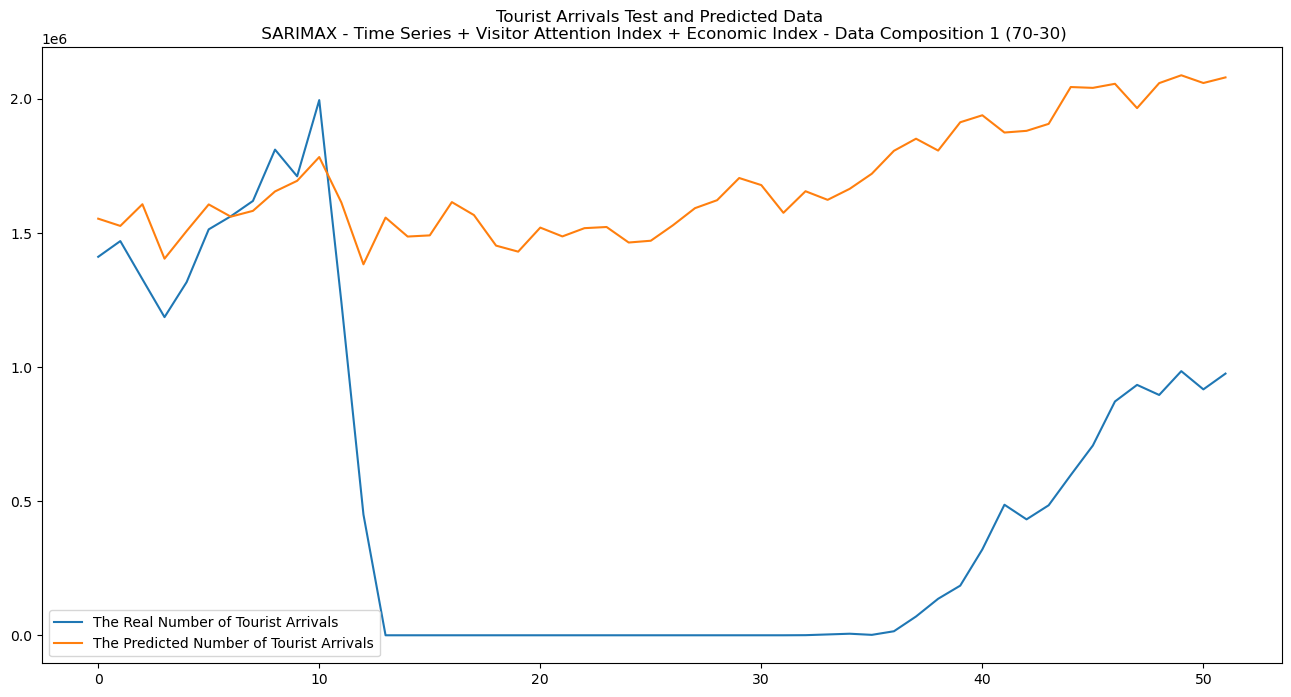

In [26]:
x_ax = range(len(test))
plt.plot(x_ax, test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SARIMAX - Time Series + Visitor Attention Index + Economic Index - Data Composition 1 (70-30)")
plt.legend()
plt.show()